Load any JSON File

In [1]:
import json

data = None
with open('replay_data/2019-09-01.json') as json_file:
    data = json.load(json_file)


traverse games and card histories

In [2]:
for game in data["games"]:
 
    cards_per_turn_player = dict()
    cards_per_turn_opponent = dict()
    for action in game["card_history"]:
        target_dict = cards_per_turn_player if action["player"] == "me" else cards_per_turn_opponent
        if action["turn"] in target_dict:
            target_dict[action["turn"]].append(action["card"]["id"])
        else:
            target_dict[action["turn"]] = [action["card"]["id"]]
    break

store isolated bigrams

In [3]:
from itertools import combinations
bigram_data_isolated = dict()

def add_isolated_turns(bigram_data, turn_dict):
    if not turn_dict:
        return
    
    for i in range(max(turn_dict)):
        if i in turn_dict:
            for card in turn_dict[i]:
                if card not in bigram_data:
                    bigram_data[card] = {}
            for bigram in combinations(turn_dict[i], 2):
                if bigram[1] in bigram_data[bigram[0]]:
                    bigram_data[bigram[0]][bigram[1]] += 1
                else:
                    bigram_data[bigram[0]][bigram[1]] = 1
                
                if bigram[0] in bigram_data[bigram[1]]:
                    bigram_data[bigram[1]][bigram[0]] += 1
                else:
                    bigram_data[bigram[1]][bigram[0]] = 1

add_isolated_turns(bigram_data_isolated, cards_per_turn_opponent)   
add_isolated_turns(bigram_data_isolated, cards_per_turn_player)

print(bigram_data_isolated)

{'UNG_940': {}, 'BOT_509': {}, 'EX1_096': {'ICC_027': 1, 'ICC_802': 1}, 'ICC_854': {}, 'UNG_032': {'GIL_584': 1}, 'GIL_584': {'UNG_032': 1, 'GIL_622': 1}, 'UNG_029': {'FP1_030': 1}, 'FP1_030': {'UNG_029': 1, 'LOOT_008': 1, 'LOOT_358': 1, 'ULD_003': 1, 'ICC_702': 1}, 'LOOT_008': {'FP1_030': 1}, 'ICC_215': {'CS1h_001': 1}, 'CS1h_001': {'ICC_215': 1, 'UNG_848': 1, 'LOOT_187': 1, 'OG_271': 1, 'LOOT_413': 1, 'BRM_028': 1, 'ULD_003': 2, 'hexfrog': 1, 'LOOT_516': 1, 'EX1_383': 1, 'ICC_830': 1}, 'UNG_848': {'CS1h_001': 1}, 'EX1_012': {'ICC_802': 1, 'BRM_028': 1}, 'ICC_802': {'EX1_012': 1, 'BRM_028': 1, 'ICC_027': 1, 'EX1_096': 1}, 'BRM_028': {'EX1_012': 1, 'ICC_802': 1, 'ULD_003': 1, 'CS1h_001': 1}, 'LOOT_187': {'CS1h_001': 1, 'ULD_003': 1, 'LOOT_516': 1, 'DAL_546': 1}, 'ICC_314t8': {'LOOT_410': 1, 'GIL_667': 1}, 'LOOT_410': {'ICC_314t8': 1, 'GIL_667': 1}, 'GIL_667': {'ICC_314t8': 1, 'LOOT_410': 1}, 'CS1_113': {}, 'ULD_003': {'LOOT_516': 3, 'DAL_546': 1, 'LOOT_187': 1, 'BRM_028': 1, 'CS1h_001'

In [4]:
from itertools import product
bigram_data_succeeding = dict()

def add_succeeding_turns(bigram_data, turn_dict):
    if not turn_dict:
        return
    
    for i in range(max(turn_dict)-1):
        if i in turn_dict and i+1 in turn_dict:
            for card in turn_dict[i]:
                if card not in bigram_data:
                    bigram_data[card] = {}
                    
            for bigram in product(turn_dict[i], turn_dict[i+1]):
                if bigram[1] in bigram_data[bigram[0]]:
                    bigram_data[bigram[0]][bigram[1]] += 1
                else:
                      bigram_data[bigram[0]][bigram[1]] = 1
                      
add_succeeding_turns(bigram_data_succeeding, cards_per_turn_opponent)   
add_succeeding_turns(bigram_data_succeeding, cards_per_turn_player)

print(bigram_data_succeeding)



{'UNG_940': {'BOT_509': 1}, 'BOT_509': {'EX1_096': 1}, 'EX1_096': {'ICC_854': 1, 'OG_271': 1, 'LOOT_413': 1, 'CS1h_001': 1}, 'ICC_854': {'UNG_032': 1}, 'UNG_032': {'GIL_584': 1, 'UNG_032': 1, 'UNG_029': 1, 'FP1_030': 1}, 'GIL_584': {'UNG_029': 1, 'FP1_030': 1, 'EX1_246': 1, 'UNG_205': 1, 'EX1_105': 1}, 'UNG_029': {'LOOT_008': 1}, 'FP1_030': {'LOOT_008': 1, 'hexfrog': 1, 'ULD_003': 1, 'LOOT_516': 1, 'CS1h_001': 1, 'OG_280': 1, 'FP1_011': 1}, 'LOOT_008': {'ICC_215': 1, 'CS1h_001': 2, 'hexfrog': 1, 'ULD_003': 1, 'LOOT_516': 1}, 'ICC_215': {'CS1h_001': 1, 'UNG_848': 1}, 'CS1h_001': {'CS1h_001': 3, 'UNG_848': 1, 'EX1_012': 1, 'ICC_802': 1, 'BRM_028': 2, 'ICC_314t8': 1, 'LOOT_410': 1, 'GIL_667': 1, 'ULD_003': 2, 'OG_280': 1, 'LOOT_358': 1, 'FP1_030': 1, 'ICC_702': 1, 'ICC_830': 1}, 'UNG_848': {'EX1_012': 1, 'ICC_802': 1, 'BRM_028': 1}, 'EX1_012': {'LOOT_187': 1, 'CS1h_001': 1}, 'ICC_802': {'LOOT_187': 1, 'CS1h_001': 2, 'OG_271': 1, 'LOOT_413': 1}, 'BRM_028': {'LOOT_187': 1, 'CS1h_001': 1, 'O

In [5]:
bigram_data_combined = dict()

def add_combined_turns(bigram_data, turn_dict):
    add_succeeding_turns(bigram_data, turn_dict)   
    add_isolated_turns(bigram_data, turn_dict)   

                      
add_combined_turns(bigram_data_combined, cards_per_turn_opponent)   
add_combined_turns(bigram_data_combined, cards_per_turn_player)

print(bigram_data_combined)


{'UNG_940': {'BOT_509': 1}, 'BOT_509': {'EX1_096': 1}, 'EX1_096': {'ICC_854': 1, 'OG_271': 1, 'LOOT_413': 1, 'CS1h_001': 1, 'ICC_027': 1, 'ICC_802': 1}, 'ICC_854': {'UNG_032': 1}, 'UNG_032': {'GIL_584': 2, 'UNG_032': 1, 'UNG_029': 1, 'FP1_030': 1}, 'GIL_584': {'UNG_029': 1, 'FP1_030': 1, 'UNG_032': 1, 'EX1_246': 1, 'UNG_205': 1, 'EX1_105': 1, 'GIL_622': 1}, 'UNG_029': {'LOOT_008': 1, 'FP1_030': 1}, 'FP1_030': {'LOOT_008': 2, 'hexfrog': 1, 'ULD_003': 2, 'LOOT_516': 1, 'CS1h_001': 1, 'OG_280': 1, 'FP1_011': 1, 'UNG_029': 1, 'LOOT_358': 1, 'ICC_702': 1}, 'LOOT_008': {'ICC_215': 1, 'CS1h_001': 2, 'hexfrog': 1, 'ULD_003': 1, 'LOOT_516': 1, 'FP1_030': 1}, 'ICC_215': {'CS1h_001': 2, 'UNG_848': 1}, 'CS1h_001': {'CS1h_001': 3, 'UNG_848': 2, 'EX1_012': 1, 'ICC_802': 1, 'BRM_028': 3, 'ICC_314t8': 1, 'LOOT_410': 1, 'GIL_667': 1, 'ULD_003': 4, 'OG_280': 1, 'LOOT_358': 1, 'FP1_030': 1, 'ICC_702': 1, 'ICC_830': 2, 'ICC_215': 1, 'LOOT_187': 1, 'OG_271': 1, 'LOOT_413': 1, 'hexfrog': 1, 'LOOT_516': 1, '

In [6]:
bigram_data_whole_game = dict()

def add_whole_game(bigram_data, turn_dict):
    if not turn_dict:
        return
    
    all_turns = []
    for i in turn_dict:
        all_turns.extend(turn_dict[i])
    
    for card in all_turns:
        if card not in bigram_data:
            bigram_data[card] = {}
                    
    for bigram in combinations(all_turns, 2):
        if bigram[1] in bigram_data[bigram[0]]:
            bigram_data[bigram[0]][bigram[1]] += 1
        else:
            bigram_data[bigram[0]][bigram[1]] = 1
        
        if bigram[0] in bigram_data[bigram[1]]:
            bigram_data[bigram[1]][bigram[0]] += 1
        else:
            bigram_data[bigram[1]][bigram[0]] = 1

                      
add_whole_game(bigram_data_whole_game, cards_per_turn_opponent)   
add_whole_game(bigram_data_whole_game, cards_per_turn_player)

print(bigram_data_whole_game)


{'UNG_940': {'BOT_509': 1, 'EX1_096': 2, 'ICC_854': 1, 'UNG_032': 2, 'GIL_584': 1, 'UNG_029': 1, 'FP1_030': 3, 'LOOT_008': 2, 'ICC_215': 1, 'CS1h_001': 8, 'UNG_848': 1, 'EX1_012': 1, 'ICC_802': 2, 'BRM_028': 2, 'LOOT_187': 2, 'ICC_314t8': 1, 'LOOT_410': 1, 'GIL_667': 1, 'CS1_113': 1, 'ULD_003': 4, 'LOOT_516': 2, 'DAL_546': 1, 'ICC_027': 1, 'OG_271': 1, 'LOOT_413': 1, 'OG_280': 2, 'hexfrog': 1, 'LOOT_358': 1, 'ICC_702': 1, 'FP1_011': 1, 'EX1_383': 1, 'ICC_830': 1, 'DAL_431': 1, 'EX1_622': 1}, 'BOT_509': {'UNG_940': 1, 'EX1_096': 2, 'ICC_854': 1, 'UNG_032': 2, 'GIL_584': 1, 'UNG_029': 1, 'FP1_030': 3, 'LOOT_008': 2, 'ICC_215': 1, 'CS1h_001': 8, 'UNG_848': 1, 'EX1_012': 1, 'ICC_802': 2, 'BRM_028': 2, 'LOOT_187': 2, 'ICC_314t8': 1, 'LOOT_410': 1, 'GIL_667': 1, 'CS1_113': 1, 'ULD_003': 4, 'LOOT_516': 2, 'DAL_546': 1, 'ICC_027': 1, 'OG_271': 1, 'LOOT_413': 1, 'OG_280': 2, 'hexfrog': 1, 'LOOT_358': 1, 'ICC_702': 1, 'FP1_011': 1, 'EX1_383': 1, 'ICC_830': 1, 'DAL_431': 1, 'EX1_622': 1}, 'EX1_09

In [7]:
bigram_data_whole_game_sequence = dict()

def add_whole_game_sequence(bigram_data, turn_dict):
    if not turn_dict:
        return
    
    all_turns = []
    for i in range(max(turn_dict)):
        if i in turn_dict:
            all_turns.extend(turn_dict[i])
    
    for card in all_turns:
        if card not in bigram_data:
            bigram_data[card] = {}
                    
    for bigram in combinations(all_turns, 2):
        if bigram[1] in bigram_data[bigram[0]]:
            bigram_data[bigram[0]][bigram[1]] += 1
        else:
            bigram_data[bigram[0]][bigram[1]] = 1
                      
add_whole_game_sequence(bigram_data_whole_game_sequence, cards_per_turn_opponent)   
add_whole_game_sequence(bigram_data_whole_game_sequence, cards_per_turn_player)

print(bigram_data_whole_game_sequence)


{'UNG_940': {'BOT_509': 1, 'EX1_096': 2, 'ICC_854': 1, 'UNG_032': 2, 'GIL_584': 1, 'UNG_029': 1, 'FP1_030': 3, 'LOOT_008': 2, 'ICC_215': 1, 'CS1h_001': 8, 'UNG_848': 1, 'EX1_012': 1, 'ICC_802': 2, 'BRM_028': 2, 'LOOT_187': 2, 'ICC_314t8': 1, 'LOOT_410': 1, 'GIL_667': 1, 'CS1_113': 1, 'ULD_003': 4, 'LOOT_516': 2, 'DAL_546': 1, 'ICC_027': 1, 'OG_271': 1, 'LOOT_413': 1, 'OG_280': 2, 'hexfrog': 1, 'LOOT_358': 1, 'ICC_702': 1, 'FP1_011': 1, 'EX1_383': 1, 'ICC_830': 1}, 'BOT_509': {'EX1_096': 2, 'ICC_854': 1, 'UNG_032': 2, 'GIL_584': 1, 'UNG_029': 1, 'FP1_030': 3, 'LOOT_008': 2, 'ICC_215': 1, 'CS1h_001': 8, 'UNG_848': 1, 'EX1_012': 1, 'ICC_802': 2, 'BRM_028': 2, 'LOOT_187': 2, 'ICC_314t8': 1, 'LOOT_410': 1, 'GIL_667': 1, 'CS1_113': 1, 'ULD_003': 4, 'LOOT_516': 2, 'DAL_546': 1, 'ICC_027': 1, 'OG_271': 1, 'LOOT_413': 1, 'OG_280': 2, 'hexfrog': 1, 'LOOT_358': 1, 'ICC_702': 1, 'FP1_011': 1, 'EX1_383': 1, 'ICC_830': 1}, 'EX1_096': {'ICC_854': 1, 'UNG_032': 2, 'GIL_584': 1, 'UNG_029': 1, 'FP1_030'

read all replays of september and store isolated bigrams

In [8]:
bigram_data_isolated = dict()
bigram_data_succeeding = dict()
bigram_data_combined = dict()
bigram_data_whole_game = dict()
bigram_data_whole_game_sequence = dict()


data = None
total_games = 0
total_files = 0

for i in range(1,31):
    with open('replay_data/2019-09-{:02d}.json'.format(i)) as json_file:
        data = json.load(json_file)
        total_files += 1
        
        for game_id, game in enumerate(data["games"]):
            #print(f"processing game nr {game_id}")
            total_games += 1
            
            cards_per_turn_player = dict()
            cards_per_turn_opponent = dict()
            for action in game["card_history"]:
                target_dict = cards_per_turn_player if action["player"] == "me" else cards_per_turn_opponent
                if action["turn"] in target_dict:
                    target_dict[action["turn"]].append(action["card"]["id"])
                else:
                    target_dict[action["turn"]] = [action["card"]["id"]]
            
            add_isolated_turns(bigram_data_isolated, cards_per_turn_opponent)   
            add_isolated_turns(bigram_data_isolated, cards_per_turn_player)
            
            add_succeeding_turns(bigram_data_succeeding, cards_per_turn_opponent)  
            add_succeeding_turns(bigram_data_succeeding, cards_per_turn_player)  
            
            add_combined_turns(bigram_data_combined, cards_per_turn_opponent)  
            add_combined_turns(bigram_data_combined, cards_per_turn_player) 
            
            add_whole_game(bigram_data_whole_game, cards_per_turn_opponent)
            add_whole_game(bigram_data_whole_game, cards_per_turn_player)
            
            add_whole_game_sequence(bigram_data_whole_game_sequence, cards_per_turn_opponent)
            add_whole_game_sequence(bigram_data_whole_game_sequence, cards_per_turn_player)
            

print(f"processed {total_games} games of {total_files} files")

processed 3392 games of 30 files


In [9]:
print(bigram_data_isolated)
print(bigram_data_succeeding)
print(bigram_data_combined)
print(bigram_data_whole_game)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



test prediction on October data sets

In [10]:
# prepare validation data 
validation_data = None
with open('replay_data/2019-10-01.json') as json_file:
    validation_data = json.load(json_file)


In [11]:
# load the first game
current_game = None
for game_id, game in enumerate(validation_data["games"]):
    current_game = game
    break

In [12]:
cards_per_turn_player = dict()
cards_per_turn_opponent = dict()
for action in current_game["card_history"]:
    target_dict = cards_per_turn_player if action["player"] == "me" else cards_per_turn_opponent
    if action["turn"] in target_dict:
        target_dict[action["turn"]].append(action["card"]["id"])
    else:
        target_dict[action["turn"]] = [action["card"]["id"]]
         



combine two predictions

In [14]:
# create prediction one
print(cards_per_turn_opponent[1])
predictions_one = {x: y for x,y in bigram_data_combined["BOT_402"].items()}  
print(sorted([(x,y) for x,y in predictions_one.items()], key=lambda tup: tup[1], reverse = True))

# create new prediction
predictions = predictions_one
for card in cards_per_turn_opponent[2]:
    predictions_two = {x: y for x,y in bigram_data_combined[card].items()}  
    
    # combine the two predictions
    for card, card_count in predictions_two.items():
        if card in predictions:
            predictions[card] += card_count
        else:
            predictions[card] = card_count
           
# print updated prediction
predictions = sorted([(x,y) for x,y in predictions.items()], key=lambda tup: tup[1], reverse = True)[:10]
print(predictions)

['BOT_402']
[('DS1h_292', 15), ('EX1_610', 10), ('GAME_005', 8), ('EX1_609', 7), ('GIL_577', 7), ('DAL_378ts', 4), ('EX1_539', 4), ('DAL_371', 3), ('EX1_611', 3), ('ULD_209', 2), ('DS1_184', 2), ('LOOT_079', 2), ('DAL_086', 2), ('EX1_533', 2), ('EX1_536', 2), ('LOE_021', 2), ('EX1_617', 2), ('EX1_538', 2), ('ULD_152', 2), ('GIL_607t', 2), ('GIL_827', 2), ('EX1_554', 1), ('DS1_183', 1), ('KAR_006', 1), ('EX1_544', 1), ('BOT_066', 1), ('ULD_003', 1), ('EX1_537', 1), ('BOT_251', 1), ('DAL_049', 1), ('ULD_723', 1), ('UNG_942', 1), ('TRL_347', 1), ('ULD_328', 1), ('DAL_415', 1), ('LOOT_080t3', 1), ('OG_134', 1), ('LOOT_217', 1), ('NEW1_031', 1), ('CS2_203', 1), ('BOT_035', 1), ('UNG_915', 1), ('CFM_335', 1), ('ULD_208', 1), ('TRL_339', 1), ('DAL_400', 1), ('BOT_438', 1), ('ULD_155', 1), ('BOT_107', 1), ('BOT_312', 1), ('DAL_378', 1), ('ICC_828', 1), ('TRL_349', 1), ('TRL_530', 1), ('GIL_581', 1), ('EX1_144', 1), ('ULD_430', 1), ('EX1_531', 1), ('TRL_566', 1)]
[('DAL_433', 216), ('TRL_348t',

In [51]:
def combine_two_predictions(base_prediction, new_prediction):
    
    # combine the two predictions
    for card, card_count in new_prediction.items():
        if card in base_prediction:
            base_prediction[card] += card_count
        else:
            base_prediction[card] = card_count


In [53]:

def evaluate_top_k_predictions_remaining_game(turn, predictions, cards_per_turn):
    correct = [False]*len(predictions)
    for pred_idx, (prediction, prediction_count) in enumerate(predictions):

        for turn_idx in range(turn+1, max(cards_per_turn)):
            if turn_idx in cards_per_turn:
                if prediction in cards_per_turn[turn_idx]:
                    correct[pred_idx] = True
                    break
    return correct
                  
                    
import numpy as np                  
def evaluate_top_k_predictions_turn_dict(bigram_data, cards_per_turn, k):
    prediction = dict()
    statistics = np.zeros((k, 2))
    observed_cards = set()
    
    if not cards_per_turn:
        return statistics
    
    for turn in range(1, max(cards_per_turn)-1):
        if turn not in cards_per_turn:
            continue
            
        for card in cards_per_turn[turn]:
            observed_cards.add(card)
            if card in bigram_data:
                new_prediction = {x: y for x,y in bigram_data[card].items()}
                combine_two_predictions(prediction, new_prediction)
        
        prediction_tuples = sorted([(x,y) for x,y in prediction.items() if x not in observed_cards], key=lambda tup: tup[1], reverse = True)[:k]
        
        correct = evaluate_top_k_predictions_remaining_game(turn, prediction_tuples, cards_per_turn)
        for idx, entry in enumerate(correct):
            if entry:
                statistics[idx, 0] += 1
            else:
                statistics[idx, 1] += 1    
    return statistics

evaluate_top_k_predictions_turn_dict(bigram_data_whole_game, cards_per_turn_opponent, 10)
evaluate_top_k_predictions_turn_dict(bigram_data_whole_game, cards_per_turn_player, 10)

 
                    
#predictions = [(x, y) for x,y in bigram_data_combined["BOT_402"].items()]  
#predictions = sorted(predictions, key=lambda tup: tup[1], reverse = True)[:10]
#evaluate_top_k_predictions_game(1, predictions, cards_per_turn_opponent)


array([[0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.]])

In [52]:
k = 10
statistics_player = np.zeros((k, 2))
statistics_opponent = np.zeros((k, 2))
bigram_data = bigram_data_whole_game

for game in validation_data["games"]:
    
    cards_per_turn_player = dict()
    cards_per_turn_opponent = dict()
    for action in game["card_history"]:
        target_dict = cards_per_turn_player if action["player"] == "me" else cards_per_turn_opponent
        if action["turn"] in target_dict:
            target_dict[action["turn"]].append(action["card"]["id"])
        else:
            target_dict[action["turn"]] = [action["card"]["id"]]

    # skip games that are too short    
    if cards_per_turn_player and cards_per_turn_opponent and max(cards_per_turn_player) > 15 and max(cards_per_turn_opponent) > 15:
        statistics_player += evaluate_top_k_predictions_turn_dict(bigram_data, cards_per_turn_player, 10)
        statistics_opponent += evaluate_top_k_predictions_turn_dict(bigram_data, cards_per_turn_opponent, 10)

print(statistics_player)
print(statistics_opponent)

[[ 0. 88.]
 [ 8. 80.]
 [12. 76.]
 [ 8. 80.]
 [ 5. 83.]
 [ 3. 85.]
 [ 0. 88.]
 [ 0. 88.]
 [ 0. 88.]
 [ 5. 83.]]
[[19. 75.]
 [ 8. 86.]
 [ 8. 86.]
 [ 6. 88.]
 [ 8. 86.]
 [ 3. 91.]
 [10. 84.]
 [ 3. 91.]
 [ 9. 85.]
 [ 5. 89.]]


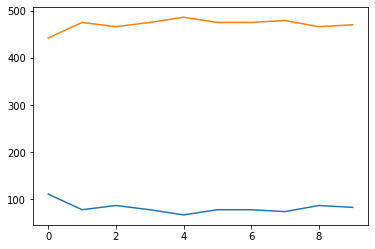

In [45]:
import matplotlib.pyplot as plt

plt.plot(statistics_player)
plt.show()

array([[ 0., 13.],
       [ 1., 12.],
       [ 2., 11.],
       [ 1., 12.],
       [ 2., 11.],
       [ 1., 12.],
       [ 1., 12.],
       [ 1., 12.],
       [ 0., 13.],
       [ 0., 13.]])